<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_2_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n20.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,34.926874,44.298448,78.609473,-45.333367,122.501428,182.593212,-60.091784
1,0.0,1.0,82.957009,30.179593,86.485543,-60.970805,148.651341,170.856699,-22.205359
2,0.0,2.0,53.642064,27.106954,25.293552,-24.997360,91.045209,126.214257,-35.169047
3,0.0,3.0,76.201629,98.540374,49.487001,38.864409,273.093413,214.995751,58.097662
4,0.0,4.0,46.111206,63.776428,89.112116,124.924488,333.924238,209.261571,124.662667
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,41.884209,75.626697,85.632532,463.378450,676.521887,259.124890,417.396998
119996,999.0,116.0,92.448161,32.726045,74.654221,-0.025865,209.802562,227.923656,-18.121094
119997,999.0,117.0,81.956694,29.923322,75.141691,45.725634,242.747340,206.612034,36.135307
119998,999.0,118.0,34.741447,82.068765,25.815578,-29.108288,123.517502,171.633554,-48.116052


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,34.926874,44.298448,78.609473,-45.333367,122.501428,182.593212,-60.091784
1,0.0,1.0,82.957009,30.179593,86.485543,-60.970805,148.651341,170.856699,-22.205359
2,0.0,2.0,53.642064,27.106954,25.293552,-24.997360,91.045209,126.214257,-35.169047
3,0.0,3.0,76.201629,98.540374,49.487001,38.864409,273.093413,214.995751,58.097662
4,0.0,4.0,46.111206,63.776428,89.112116,124.924488,333.924238,209.261571,124.662667
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,41.884209,75.626697,85.632532,463.378450,676.521887,259.124890,417.396998
119996,999.0,116.0,92.448161,32.726045,74.654221,-0.025865,209.802562,227.923656,-18.121094
119997,999.0,117.0,81.956694,29.923322,75.141691,45.725634,242.747340,206.612034,36.135307
119998,999.0,118.0,34.741447,82.068765,25.815578,-29.108288,123.517502,171.633554,-48.116052


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    34.926874  44.298448  ...  182.593212  -60.091784
      1.0    82.957009  30.179593  ...  170.856699  -22.205359
      2.0    53.642064  27.106954  ...  126.214257  -35.169047
      3.0    76.201629  98.540374  ...  214.995751   58.097662
      4.0    46.111206  63.776428  ...  209.261571  124.662667
...                ...        ...  ...         ...         ...
999.0 115.0  41.884209  75.626697  ...  259.124890  417.396998
      116.0  92.448161  32.726045  ...  227.923656  -18.121094
      117.0  81.956694  29.923322  ...  206.612034   36.135307
      118.0  34.741447  82.068765  ...  171.633554  -48.116052
      119.0  22.397620  69.325109  ...  172.776751  -18.055022

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    34.926874  44.298448  ...  182.593212  -60.091784
      1.0    82.957009  30.179593  ...  170.856699  -22.205359
      2.0    53.642064  27.106954  ...  126.214257  -35.169047
      3.0    76.201629  98.540374  ...  214.995751   58.097662
      4.0    46.111206  63.776428  ...  209.261571  124.662667
...                ...        ...  ...         ...         ...
999.0 115.0  41.884209  75.626697  ...  259.124890  417.396998
      116.0  92.448161  32.726045  ...  227.923656  -18.121094
      117.0  81.956694  29.923322  ...  206.612034   36.135307
      118.0  34.741447  82.068765  ...  171.633554  -48.116052
      119.0  22.397620  69.325109  ...  172.776751  -18.055022

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,34.926874,44.298448,78.609473,-45.333367,122.501428,182.593212,-60.091784
1,0.0,1.0,82.957009,30.179593,86.485543,-60.970805,148.651341,170.856699,-22.205359
2,0.0,2.0,53.642064,27.106954,25.293552,-24.997360,91.045209,126.214257,-35.169047
3,0.0,3.0,76.201629,98.540374,49.487001,38.864409,273.093413,214.995751,58.097662
4,0.0,4.0,46.111206,63.776428,89.112116,124.924488,333.924238,209.261571,124.662667
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,41.884209,75.626697,85.632532,463.378450,676.521887,259.124890,417.396998
119996,999.0,116.0,92.448161,32.726045,74.654221,-0.025865,209.802562,227.923656,-18.121094
119997,999.0,117.0,81.956694,29.923322,75.141691,45.725634,242.747340,206.612034,36.135307
119998,999.0,118.0,34.741447,82.068765,25.815578,-29.108288,123.517502,171.633554,-48.116052


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    34.926874  44.298448  ...  182.593212  -60.091784
      1.0    82.957009  30.179593  ...  170.856699  -22.205359
      2.0    53.642064  27.106954  ...  126.214257  -35.169047
      3.0    76.201629  98.540374  ...  214.995751   58.097662
      4.0    46.111206  63.776428  ...  209.261571  124.662667
...                ...        ...  ...         ...         ...
999.0 115.0  41.884209  75.626697  ...  259.124890  417.396998
      116.0  92.448161  32.726045  ...  227.923656  -18.121094
      117.0  81.956694  29.923322  ...  206.612034   36.135307
      118.0  34.741447  82.068765  ...  171.633554  -48.116052
      119.0  22.397620  69.325109  ...  172.776751  -18.055022

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

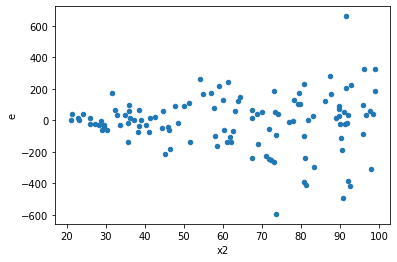

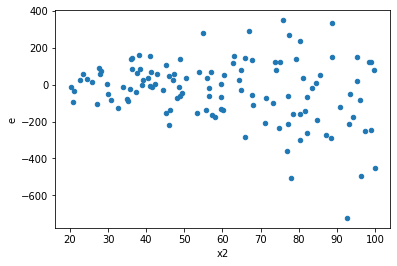

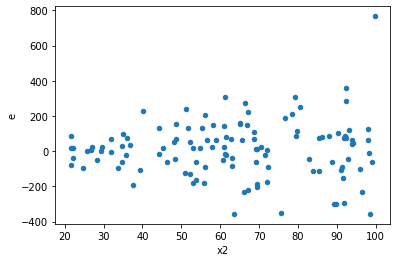

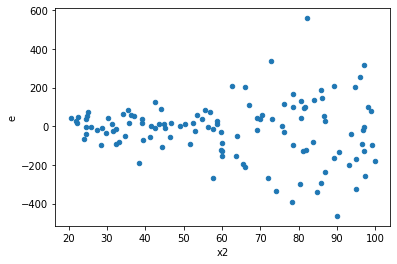

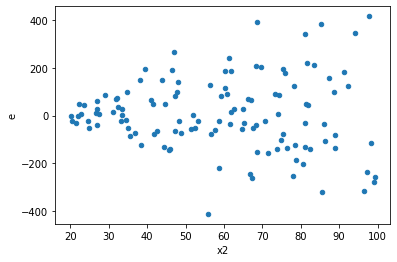

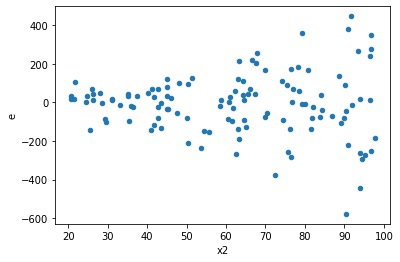

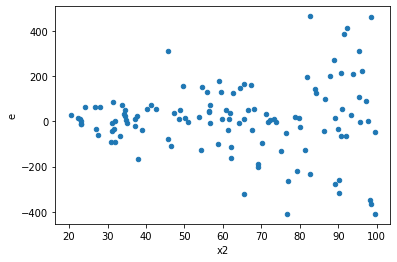

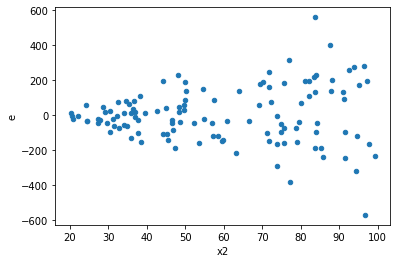

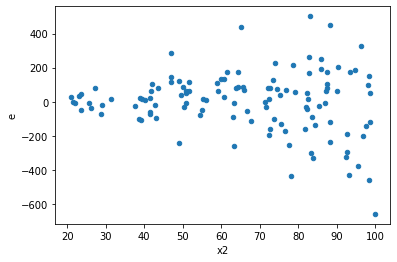

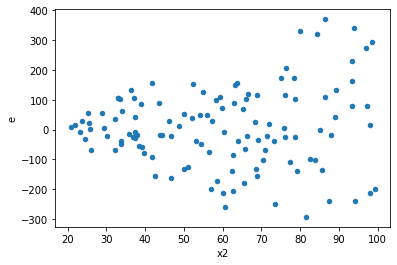

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,2352306.7718833857,316154.72461571044,53461.51754280422,7185.334650357056,7.440365709361582,4.5178483176755435e-10,0.9999999997741076,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,2169765.0599287744,324968.52863132616,49312.84227110851,7385.648377984686,6.676846736720014,2.9014459723697428e-09,0.999999998549277,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,1676918.2356183412,479051.6453644951,38111.778082235025,10887.537394647616,3.500495722840964,5.0345825030717606e-05,0.9999748270874846,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,2086223.4698674325,167000.9167015246,47414.169769714375,3795.475379580105,12.492287533942541,3.197442310920451e-14,0.999999999999984,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,1776046.3801064682,338686.1052663026,40364.69045696519,7697.411483325059,5.243930449139613,1.4908714529582312e-07,0.9999999254564274,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,2235220.882586448,310355.2612749415,50800.47460423745,7053.52866533958,7.202136266046033,7.945979429990757e-10,0.999999999602701,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,2059246.5942909126,276077.51073286624,46801.058961157105,6274.488880292414,7.458943645299121,4.325688696127372e-10,0.9999999997837156,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,2326647.714975644,270749.6550248012,52878.357158537365,6153.401250563664,8.5933543101376,3.5111247242980426e-11,0.9999999999824444,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,2290183.267764239,312917.85912265244,52049.619721914525,7111.769525514828,7.318800129162875,6.01621863438595e-10,0.9999999996991891,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,2352306.7718833857,316154.72461571044,53461.51754280422,7185.334650357056,7.440365709361582,4.5178483176755435e-10,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,2169765.0599287744,324968.52863132616,49312.84227110851,7385.648377984686,6.676846736720014,2.9014459723697428e-09,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,1676918.2356183412,479051.6453644951,38111.778082235025,10887.537394647616,3.500495722840964,5.0345825030717606e-05,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,2086223.4698674325,167000.9167015246,47414.169769714375,3795.475379580105,12.492287533942541,3.197442310920451e-14,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,1776046.3801064682,338686.1052663026,40364.69045696519,7697.411483325059,5.243930449139613,1.4908714529582312e-07,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,2235220.882586448,310355.2612749415,50800.47460423745,7053.52866533958,7.202136266046033,7.945979429990757e-10,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,2059246.5942909126,276077.51073286624,46801.058961157105,6274.488880292414,7.458943645299121,4.325688696127372e-10,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,2326647.714975644,270749.6550248012,52878.357158537365,6153.401250563664,8.5933543101376,3.5111247242980426e-11,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,2290183.267764239,312917.85912265244,52049.619721914525,7111.769525514828,7.318800129162875,6.01621863438595e-10,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64